In [179]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
from pyts.image import GramianAngularField
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
np.random.seed(46)
path = 'C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/dataset/final_df.csv'

In [180]:
dataset = pd.read_csv(path)
dataset.drop(['Time', 'labels'], inplace=True, axis = 1)
dataset.head()

,ID,hr,temp
0,0,100.943333,155.060433
1,0,100.943333,155.060433
2,0,100.943333,155.060433
3,0,97.360000,82.106448
4,0,91.260000,22.577358


## Outliers Removing

In [181]:
outlier_detector = IsolationForest(bootstrap=True, warm_start=True, contamination = 0.05, max_samples = 10000, random_state=46)
dataset['outliers'] = outlier_detector.fit_predict(dataset[['hr','temp']])

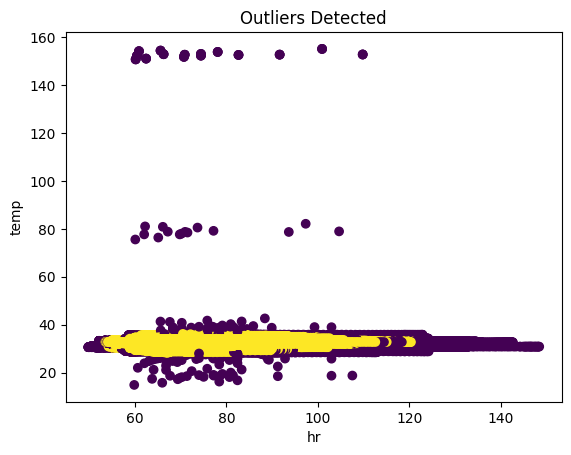

In [182]:
plt.scatter(dataset['hr'], dataset['temp'], c = dataset['outliers'])
plt.title('Outliers Detected')
plt.xlabel('hr')
plt.ylabel('temp')
plt.show()

In [183]:
dataset = dataset[dataset['outliers'] != -1]
dataset = dataset.drop('outliers', axis=1)

In [184]:
scaler = MinMaxScaler((-1, 1))
columns_to_scale = ['hr', 'temp']
scaled_df = dataset.copy(deep=True)
scaled_df[['hr', 'temp']] = scaler.fit_transform(scaled_df[['hr', 'temp']])
scaled_df.head()

,ID,hr,temp
6,0,-0.003678,-0.631151
8,0,-0.059245,-0.157346
10,0,-0.092147,0.072107
12,0,-0.119284,0.208310
14,0,-0.150994,0.299674


## Gramian Angular Field Images

In [185]:
for i in scaled_df['ID'].unique():
    df = scaled_df[scaled_df['ID'] == i]
    array = df[['hr', 'temp']].values
    array = np.transpose(array)

    transformer = GramianAngularField(image_size = 250, sample_range=(-1, 1))
    img = transformer.fit_transform(array)

    black = np.zeros((1, 250, 250), dtype=np.float32)
    gaf = np.concatenate((img, black), axis=0)

    scaled = (gaf - gaf.min()) / (gaf.max() - gaf.min())

    output_folder = 'C:/Users/aless/Desktop/gaf_imgs'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    filename = os.path.join(output_folder, f'img_{i}.png')
    
    scaled = np.transpose(scaled, (1, 2, 0))
    plt.imsave(filename, scaled)